<a href="https://colab.research.google.com/github/UEPP40/PUM/blob/czyzewska/Czy%C5%BCewska_XAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



```
instalacja dodatkowych bibliotek
```



In [1]:
!pip install lime
!pip install shap
!pip install xgboost


importy bibliotek

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# library to feature importance
import lime
from lime.lime_tabular import LimeTabularExplainer
import shap

# import the regressor and metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, median_absolute_error
from sklearn.model_selection import train_test_split
from sklearn import datasets, ensemble

dane dotyczące cen domów w Kalifornii

In [3]:
# Load the dataset
data = pd.read_csv("/content/sample_data/california_housing_train.csv")

# Display basic information about the dataset
print(data.info())
print(data.shape)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   total_rooms         17000 non-null  float64
 4   total_bedrooms      17000 non-null  float64
 5   population          17000 non-null  float64
 6   households          17000 non-null  float64
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB
None
(17000, 9)


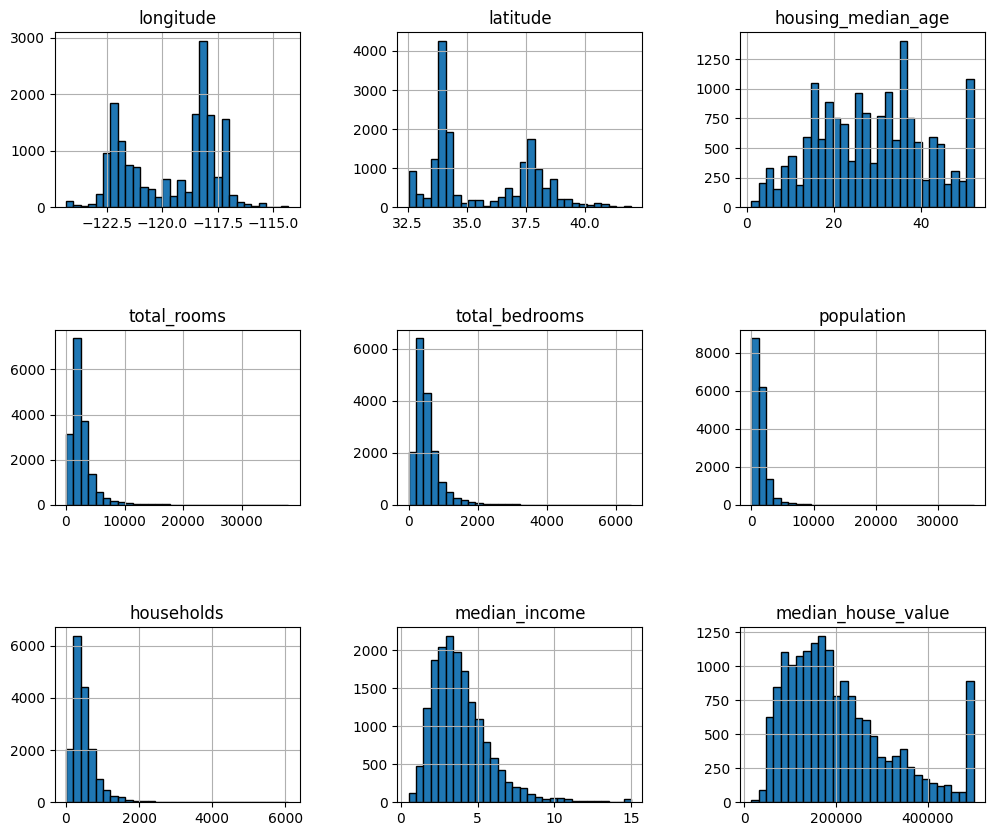

In [4]:
import matplotlib.pyplot as plt


data.hist(figsize=(12, 10), bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.7, wspace=0.4)

In [5]:
from sklearn.preprocessing import MinMaxScaler

data['households'].replace("no", np.nan , inplace=True)
data['total_bedrooms'] = data['total_bedrooms'].fillna(data['total_bedrooms'].mean())


X = data.drop(["median_house_value"],axis=1)
y = data.median_house_value
# scaler = MinMaxScaler()
# scaler.fit(X)
# X = scaler.transform(X)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13)

The mean squared error (RMSE) Decision tree on test set: 69191.5059
The median absolute error (MAE) Decision tree on test set: 25600.0000


<Axes: >

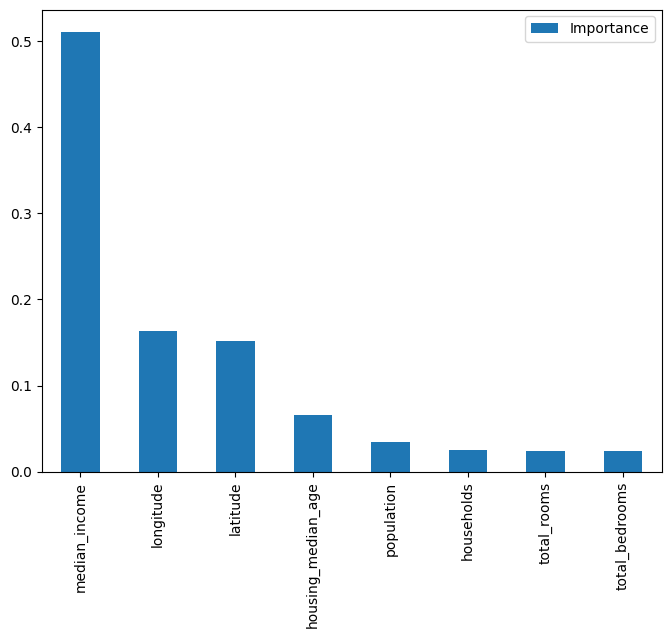

In [7]:
# create a regressor object
regressor = DecisionTreeRegressor(random_state=0)
y_pred = regressor.fit(X_train, y_train).predict(X_test)
# fit the regressor with X and Y data

rmse = mean_squared_error(y_test, y_pred, squared = False)
median_err = median_absolute_error(y_test, y_pred)
print("The mean squared error (RMSE) Decision tree on test set: {:.4f}".format(rmse))
print("The median absolute error (MAE) Decision tree on test set: {:.4f}".format(median_err))

feat_importances = pd.DataFrame(regressor.feature_importances_, index=X_train.columns, columns=["Importance"])
feat_importances.sort_values(by='Importance', ascending=False, inplace=True)
feat_importances.plot(kind='bar', figsize=(8,6))

The root mean squared error (RMSE) XGBoost on test set: 53091.5817
The median absolute error (MAE) XGBoost on test set: 26630.0784


<Axes: >

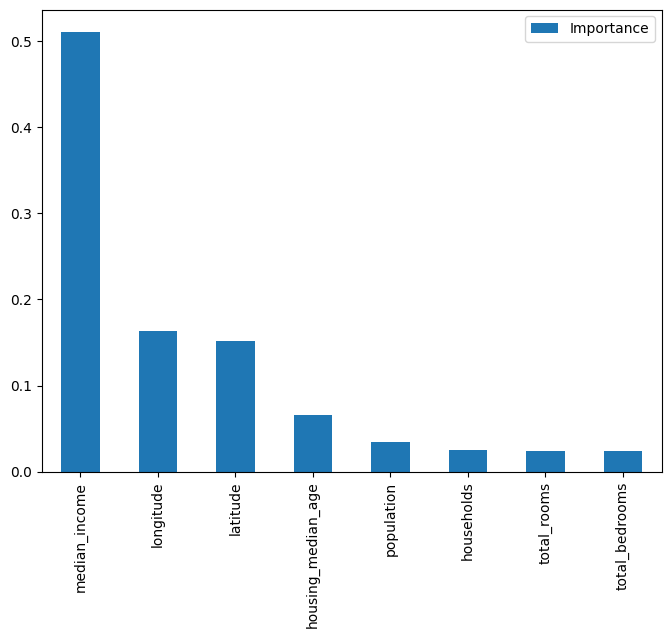

In [12]:
params = {
    "n_estimators": 500,
    "max_depth": 4,
    "min_samples_split": 5,
    "learning_rate": 0.01,
    "loss": "squared_error",
}

reg = ensemble.GradientBoostingRegressor()
reg.fit(X_train, y_train)
y_pred = reg.fit(X_train, y_train).predict(X_test)

rmse = mean_squared_error(y_test, y_pred, squared = False)
median_err = median_absolute_error(y_test, y_pred)

print("The root mean squared error (RMSE) XGBoost on test set: {:.4f}".format(rmse))
print("The median absolute error (MAE) XGBoost on test set: {:.4f}".format(median_err))

#plot feature importances
feat_importances = pd.DataFrame(regressor.feature_importances_, index=X_train.columns, columns=["Importance"])
feat_importances.sort_values(by='Importance', ascending=False, inplace=True)
feat_importances.plot(kind='bar', figsize=(8,6))

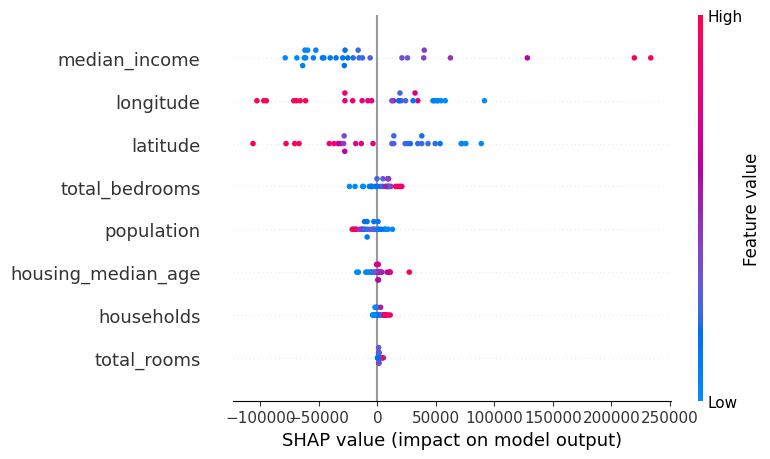

In [28]:
shap.initjs()
# Create the explainer
explainer = shap.Explainer(reg,  feature_names = X_train.columns)
# Evaluate SHAP values
shap_values = explainer.shap_values(X_test)

# check values for 30 - instances
shap_values = explainer.shap_values(X_test[:30])

#visualize the SHAP values for the 30 instances
shap.summary_plot(shap_values, X_test[:30])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


Intercept 223779.6359629605
Prediction_local [342251.82040637]
Right: 225434.9505062695


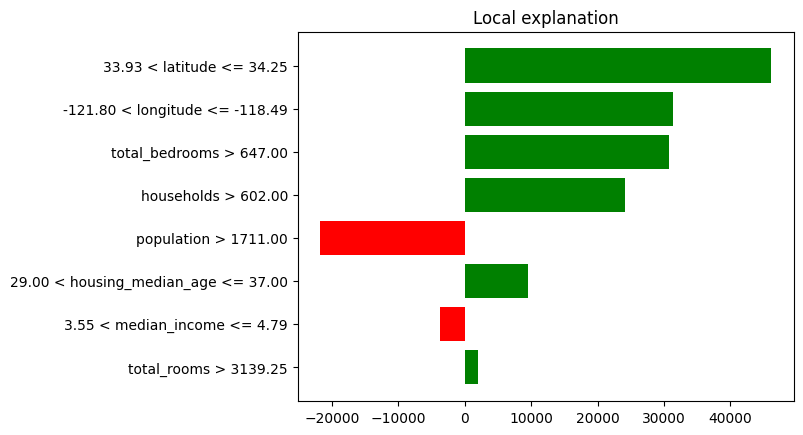

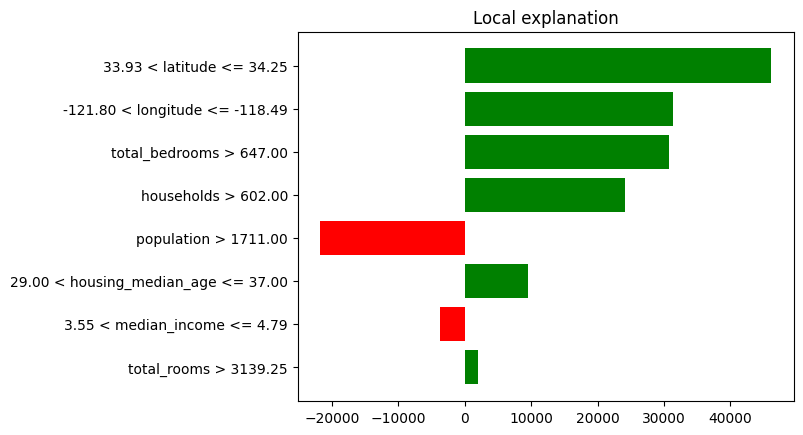

In [34]:
explainer_2 = lime.lime_tabular.LimeTabularExplainer(X_train.values, feature_names=X_train.columns.values.tolist(),
class_names=['median_house_value'], verbose=True, mode='regression')

# Choose the 5th instance and use it to predict the results
instance = X_train.iloc[4].values.reshape(1, -1)

# Generate explanation
explanation2 = explainer_2.explain_instance(X_test.values[30], reg.predict, num_features=8)

# Show the explanation
explanation2.as_pyplot_figure()
# plot graph

Variable Importance Plot - Global Interpretation


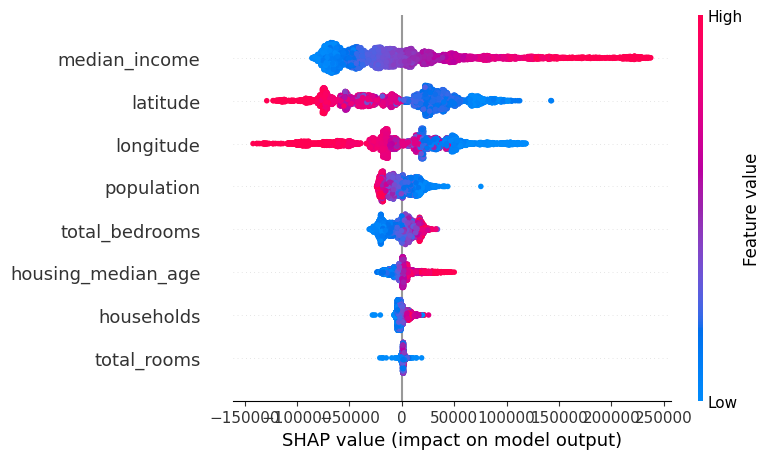

In [35]:
shap_values = explainer.shap_values(X_test)
print("Variable Importance Plot - Global Interpretation")
#graph summary
shap.summary_plot(shap_values, X_test)